In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('iris.data', header=None)

In [4]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [5]:
Iris_setosa = df[df[4]=='Iris-setosa']
del Iris_setosa[4]
Iris_versicolor = df[df[4]=='Iris-versicolor']
del Iris_versicolor[4]
Iris_virginica = df[df[4]=='Iris-virginica']
del Iris_virginica[4]

In [34]:
NumDataPerClass = Iris_versicolor[0].size

In [35]:
Iris_versicolor

,0,1,2,3
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [7]:
Y = np.concatenate((Iris_setosa, Iris_versicolor))
Y.shape

(100, 4)

In [8]:
O = np.ones((2*NumDataPerClass, 1))
O.shap

(100, 1)

In [33]:
Y[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

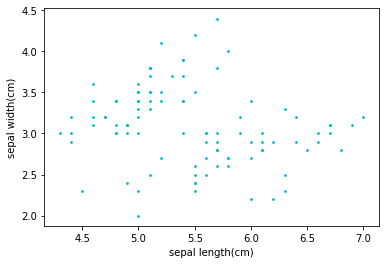

In [36]:
Y = np.append(Y, O, axis = 1)
Y
plt.scatter(Y[:,0], Y[:,1], s = 3, c ='c')
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.savefig('Scatter plot of Iris Plants.png')

In [10]:
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass)
f = np.concatenate((labelPos, labelNeg))

In [11]:
rIndex = np.random.permutation(2*NumDataPerClass)
Yr = Y[rIndex,]
fr = f[rIndex]

In [12]:
index = np.arange(10)
index_arr = index

In [13]:
Y_train = Yr[0:NumDataPerClass]
f_train = fr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass]
f_test = fr[NumDataPerClass:2*NumDataPerClass]

In [14]:
(Y_train.shape, f_train.shape, Y_test.shape, f_test.shape)

((50, 5), (50,), (50, 5), (50,))

In [15]:
Ntrain = NumDataPerClass

In [16]:
Ntest = NumDataPerClass

In [17]:
# Calculate the percentage of correctly classfied examples
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n]*np.dot(OneInput, weights)>0): 
            nCorrect +=1
    return 100*nCorrect/N

In [18]:
#a = np.random.randn(2)
a = np.random.randn(5)
print(a)

[ 0.56060742 -0.60188943 -0.05120003  0.49582195 -0.42113304]


In [19]:
print("Initial Accuracy Percentage:", PercentCorrect(Y_train, f_train, a))

Initial Percentage Correct: 46.0


In [20]:
MaxIter = 1000
alpha = 0.01

In [21]:
# Space for plots
P_train = np.zeros(MaxIter)

In [22]:
P_test = np.zeros(MaxIter)

In [23]:
z = np.floor(np.random.rand()*100).astype(int)
print(z)

39


In [24]:
# Main Loop
for iter in range(MaxIter):
    #select a data item at random
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    y = Y_train[r,:]
    # If it is misclassfied, update weights
    if (f_train[r] * np.dot(y, a)<0):
        a += alpha * f_train[r] * y
    #Evaluate training and test performances for plotting
    P_train[iter] = PercentCorrect(Y_train, f_train, a)
    P_test[iter] = PercentCorrect(Y_test, f_test, a)

In [29]:
print('Accuracy Percentage After Training:', PercentCorrect(Y_train, f_train,a), PercentCorrect(Y_test, f_test,a) )

Accuracy Percentage After Training: 100.0 96.0


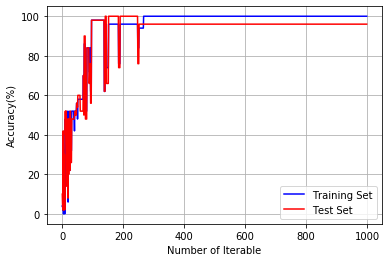

In [32]:
plt.plot(range(MaxIter), P_train, 'b', range(MaxIter), P_test, 'r')
plt.grid(True)
plt.gca().legend(('Training Set', 'Test Set'))
plt.xlabel('Number of Iterable')
plt.ylabel('Accuracy(%)')
plt.savefig('Learning curve.png')

In [27]:
# Accuracy generated by sklearn Perceptron model
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(Y_train, f_train)
fh_train = model.predict(Y_train)
print(accuracy_score(fh_train, f_train))

1.0
